# Model Development: Laptop Pricing

In this task, I will use linear regression priciples to creata module that predicts the price of the laptop, based on one or more attributes of the dataset.

### Objectives
   - Use Linear Regression in one variable to fit the parameters to a model
   - Use Linear Regression in multiple variables to fit the parameters to a model
   - Use Polynomial Regression in single variable to fit the parameters to a model
   - Create a pipeline for performing linear regression using multiple features in polynomial scaling
   - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters.
   
### Setup

   - pandas for managing data.
   - numpy for mathematical operations
   - sklearn for machine learning and machine-learning-pipeline related functions.
   - seaborn for visualizing the data
   - matplotlib for additional plotting tools

In [5]:
# Importing Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
%matplotlib inline

In [7]:
# Importing the dataset
df = pd.read_csv(r"C:\Users\Aayush\Documents\Python Learning\pandas-project\Data Analysis with python\Task 4 Model Development Laptop Pricing\laptop_pricing_dataset_mod2.csv",header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1: Simple Linear Regression

We have learnt that "CPU_frequency" is the parameter with the lowest p-value among differnt features of the dataset. Creating single feature Linear Regression model that fits the part of 'CPU_frequncy' and 'Price' to find the model for prediction.

In [10]:
lm = LinearRegression()
lm

LinearRegression()

In [13]:
X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

LinearRegression()

In [14]:
Yhat = lm.predict(X)
Yhat[0:4]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392])

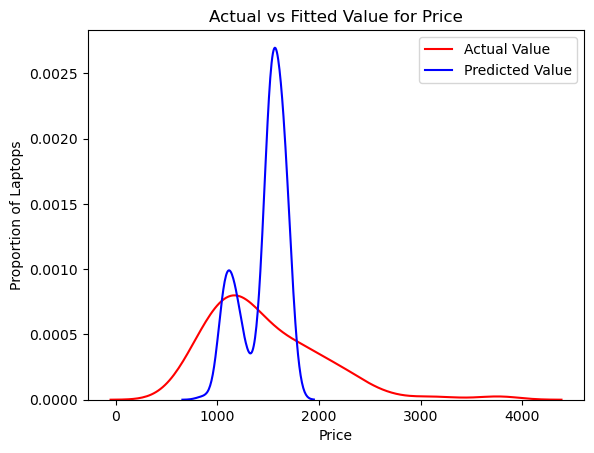

In [15]:
# distribution plot for the predicted values and that of actual values

ax1 = sns.distplot(df['Price'],hist=False, color ='r',label='Actual Value')

sns.distplot(Yhat,hist = False, color = 'b',label='Fitted Values',ax = ax1)

plt.title('Actual vs Fitted Value for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')

plt.legend(['Actual Value','Predicted Value'])
plt.show()


In [17]:
# Evaluate the Mean Squared Error and R^2 score values for the model

mse_slm = mean_squared_error(df['Price'],Yhat)
r2_score_slm = lm.score(X,Y)

print('Mean Square Error(MSE) for SLR is ',mse_slm)
print('The R-square for Linear Regression is: ',r2_score_slm)

Mean Square Error(MSE) for SLR is  284583.4405868629
The R-square for Linear Regression is:  0.1344436321024326


(0.0, 3974.15)

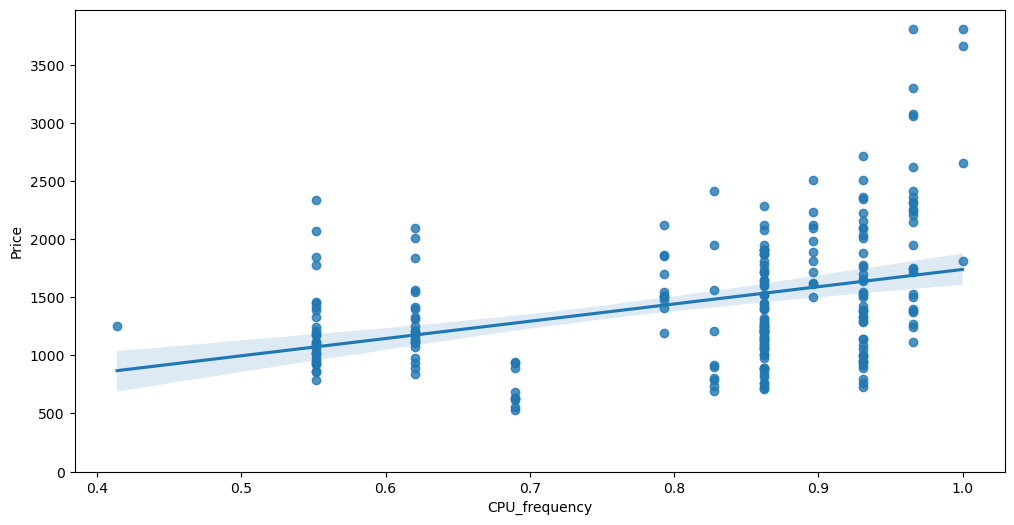

In [37]:
plt.figure(figsize=(12,6))
sns.regplot(x='CPU_frequency',y='Price',data = df)
plt.ylim(0,)

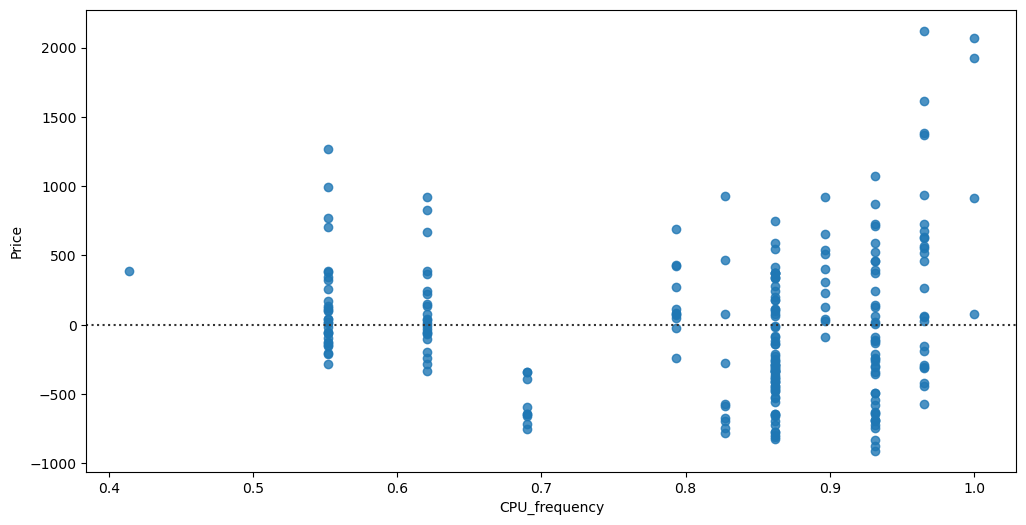

In [39]:
plt.figure(figsize=(12,6))

sns.residplot(x='CPU_frequency',y='Price',data=df)
plt.show()

# Task 2 - Multiple Linear Regression

The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency','Storage_GB_SSD', 'CPU_core','OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression

In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [19]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [20]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD', 'CPU_core','OS', 'GPU','Category']]

lm1.fit(Z,Y)

LinearRegression()

In [21]:
Y_hat = lm1.predict(Z)
Y_hat[0:4]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012])

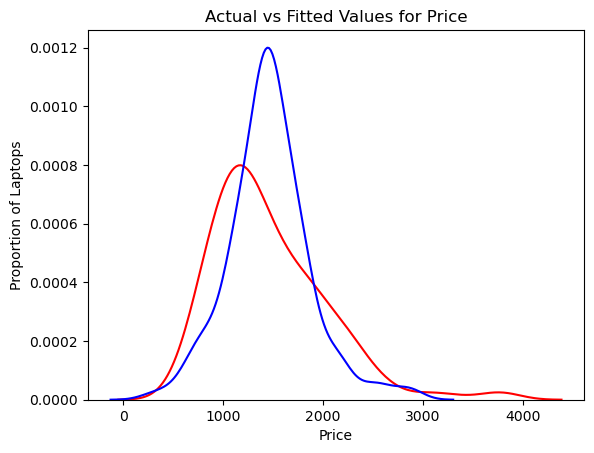

In [22]:
# Plot the distribution plot of the predicted values as well as Actual values

ax1 = sns.distplot(df['Price'],hist = False, color = 'r',label = 'Actual Value')
sns.distplot(Y_hat,hist=False, color = 'b',label = 'Fitted Value',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')

plt.show()

In [24]:
# Find R^2 score and MSE value for this fit

mse_mlr = mean_squared_error(df['Price'],Y_hat)
r2_score_mlr = lm1.score(Z,Y)

print('Mean Square Error(MSE) for SLR is ',mse_mlr)
print('The R-square for Linear Regression is: ',r2_score_mlr)

Mean Square Error(MSE) for SLR is  161680.5726389311
The R-square for Linear Regression is:  0.5082509055187374


# Task 3 - Polynomial Regression

Use the variable 'CPU_frequency' to create Polynomial features. Try this for 3 different values of polynomial degrees. Polynomial fits are done using numpy.polyfit()

In [25]:
X = X.to_numpy().flatten()

f1 = np.polyfit(X,Y,1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y,5)
p5 = np.poly1d(f5)


poly1d([ 1357222.50879801, -4719545.23458483,  6458170.08678913,
       -4336492.05993684,  1425400.75895871,  -181813.39396735])

In [26]:
p1,p3,p5

(poly1d([1485.19362648,  253.66117069]),
 poly1d([ 34090.28459545, -65742.18380715,  41288.68534408,  -7238.3350619 ]),
 poly1d([ 1357222.50879801, -4719545.23458483,  6458170.08678913,
        -4336492.05993684,  1425400.75895871,  -181813.39396735]))

Plot the regression output against the actual data points to notw how the data fits in each case. 

In [27]:
def Polyplot(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

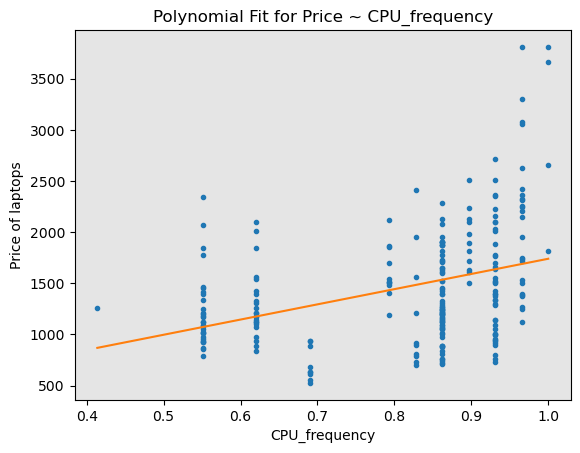

In [28]:
Polyplot(p1,X,Y,'CPU_frequency')

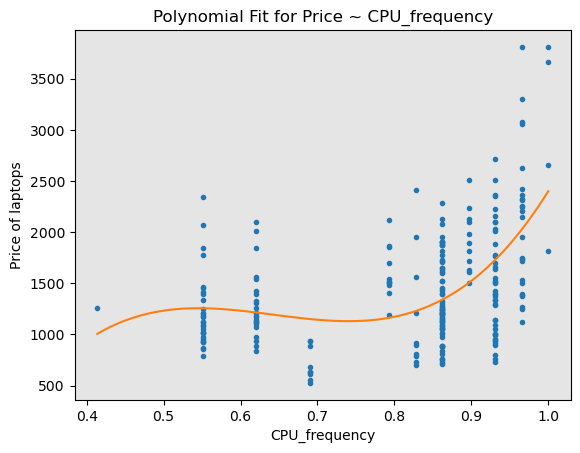

In [29]:
Polyplot(p3,X,Y,'CPU_frequency')

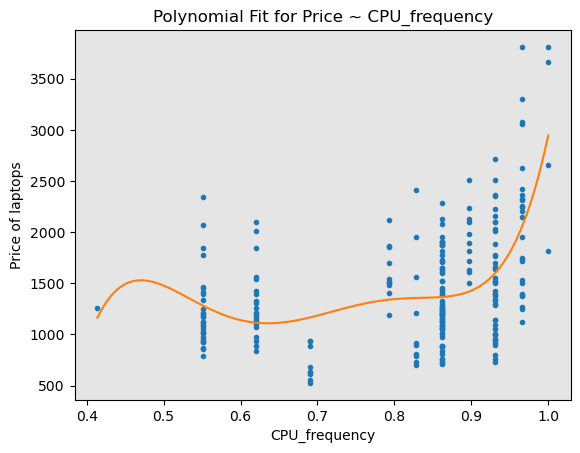

In [30]:
Polyplot(p5,X,Y,'CPU_frequency')

In [31]:
# Calculate R^2 and MSE values for these fit

r_square_1 = r2_score(Y,p1(X))
r_square_3 = r2_score(Y,p3(X))
r_square_5 = r2_score(Y,p5(X))
print('The R-square value for 1st degree polynomial is: ',r_square_1)
print('The R-square value for 3rd degree polynomial is: ',r_square_3)
print('The R-square value for 5th degree polynomial is: ',r_square_5)

The R-square value for 1st degree polynomial is:  0.1344436321024326
The R-square value for 3rd degree polynomial is:  0.2669264079653094
The R-square value for 5th degree polynomial is:  0.3030822706442371


In [33]:
print('The MSE value for 1st degree polynomial is: ',mean_squared_error(Y,p1(X)))
print('The MSE value for 3rd degree polynomial is: ',mean_squared_error(Y,p3(X)))
print('The MSE value for 5th degree polynomial is: ',mean_squared_error(Y,p5(X)))

The MSE value for 1st degree polynomial is:  284583.4405868629
The MSE value for 3rd degree polynomial is:  241024.86303848823
The MSE value for 5th degree polynomial is:  229137.29548058534


# Task 4- Pipeline

Lets create a pipeline that performs parameter scaling. Polynomial Features generatoin and Linear Regression. Use set of multiple features as before to create this pipeline

In [35]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype(float)

pipe.fit(Z,Y)

y_pipe = pipe.predict(Z)
y_pipe[0:4]

array([1480.3125,  780.5625, 1268.3125, 1001.375 ])

In [36]:
# Calculate MSE and R^2 values for this predicted output

print("MSE ofr multi-variable polynomial pipeline is: ",mean_squared_error(Y,y_pipe))

print('R-squared for multi-variable polynomial pipeline is: ',r2_score(Y,y_pipe))

MSE ofr multi-variable polynomial pipeline is:  120605.53512342437
R-squared for multi-variable polynomial pipeline is:  0.6331800307336903


We saw that value of R^2 increased as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value

# Task 2.1 - Multiple Linear Regression

In [42]:
df['OS'].value_counts()

OS
1    224
2     14
Name: count, dtype: int64

In [40]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [48]:
lm2 = LinearRegression()


A = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','Screen_Size_inch','OS','CPU_core',"GPU"]]
B = df['Price']

lm2.fit(A,B)
lm2

LinearRegression()

In [49]:
yhat = lm2.predict(A)
yhat[0:4]

array([1238.39485524,  638.67580764, 1588.25022042, 1227.70033034])

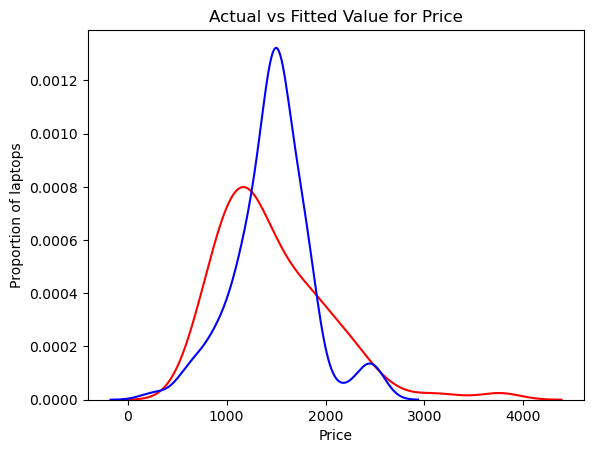

In [50]:
# distribution plot

ax1 = sns.distplot(df['Price'],hist =False,color = 'r',label = 'Actual Value')
sns.distplot(yhat, hist = False, color ='b', label = 'Fitted Value', ax = ax1)

plt.title('Actual vs Fitted Value for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

plt.show()

In [51]:
# Find R^2 score and MSE value for this fit

mse_mlr2 = mean_squared_error(df['Price'],yhat)
r2_score_mlr2 = lm2.score(A,B)

print('Mean Square Error(MSE) for SLR is ',mse_mlr2)
print('The R-square for Linear Regression is: ',r2_score_mlr2)

Mean Square Error(MSE) for SLR is  177295.76788530717
The R-square for Linear Regression is:  0.46075751780231744


<b>Note</b>: 
   - We are calculating the improvement in Mean Square Error (MSE) achieved by Multiple Linear Regression (MLR) model compared to the Simple Linear Regression (SLR) model.
   - SLR MSE and MLR MSE is provided
   - We calculate the difference between two MSE values (SLR MSE - MLR MSE), then divide this difference by SLR MSE and multiply by 100% to express it as a percentage

1. Mean Square Error(MSE) for SLR is  284583.4405868629
2. Mean Square Error(MSE) for SLR is  161680.5726389311 (MLR MSE 1) (43%)
3. Mean Square Error(MSE) for SLR is  177295.76788530717 (MLR MSE 2) (37%)

<b> First Mutliple Linear Regression Model is more effecient than second one!</b>

